# Titanic Spaceship Prediction

### Random Forest & Decision Tree Classifiers are used

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [2]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Getting insights for analysis

In [3]:
train.shape

(8693, 14)

In [4]:
test.shape

(4277, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
%matplotlib inline  
sns.set()           #load seaborn's default theme

def bar_chart(feature):
    transported = train[train['Transported']==True] [feature].value_counts()
    dead = train[train['Transported']==False] [feature].value_counts()
    
    df = pd.DataFrame([transported,dead])
    df.index = ['Transported','Dead']
    
    df.plot(kind = 'bar')

In [9]:
#check unique values

train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [10]:
print(train["HomePlanet"].unique())
print(len(train["HomePlanet"].unique()))

print(train["HomePlanet"].value_counts())

['Europa' 'Earth' 'Mars' nan]
4
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


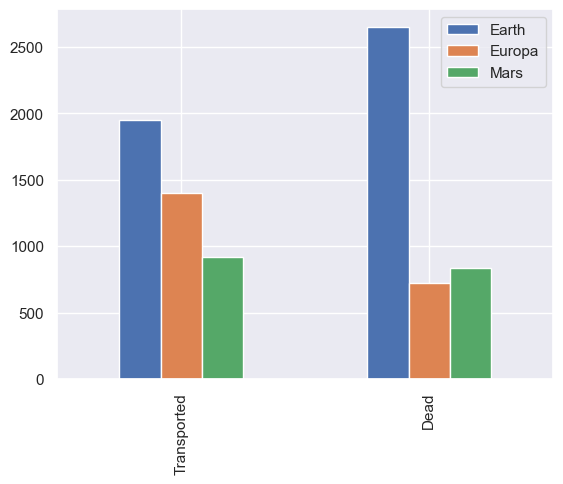

In [11]:
bar_chart("HomePlanet")

In [12]:
print(train["Destination"].unique())
print(len(train["Destination"].unique()))
print(train["Destination"].value_counts())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
4
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


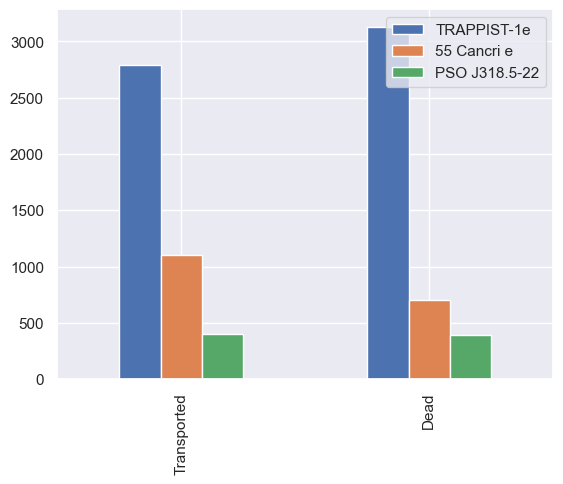

In [13]:
bar_chart("Destination")

In [14]:
print(train["CryoSleep"].value_counts())

False    5439
True     3037
Name: CryoSleep, dtype: int64


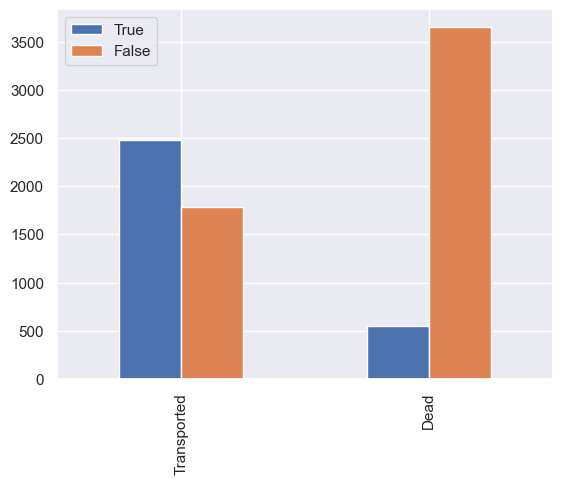

In [15]:
bar_chart("CryoSleep")

In [16]:
print(train["VIP"].value_counts())

False    8291
True      199
Name: VIP, dtype: int64


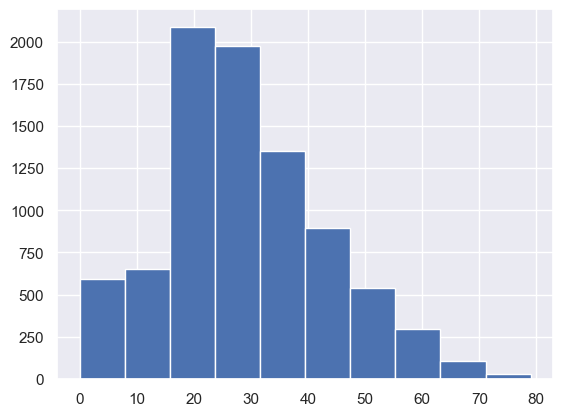

In [17]:
plt.hist(train['Age'])
plt.show()

### Handling Missing Values

In [18]:
# numeric value ---> median
# object value ----> mode

# Will use "Random forest" and "Decision Tree" for prediction that's why filling with mode,median

In [19]:
train_test=[train, test]

In [20]:
# numeric type
for dataset in train_test:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['RoomService'] = dataset['RoomService'].fillna(dataset['RoomService'].median())
    dataset['FoodCourt'] = dataset['FoodCourt'].fillna(dataset['FoodCourt'].median())
    dataset['Spa'] = dataset['Spa'].fillna(dataset['Spa'].median())
    dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].median())
    dataset['VRDeck'] = dataset['VRDeck'].fillna(dataset['VRDeck'].median())

In [21]:
# object type
for dataset in train_test:
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0])
    dataset['CryoSleep'] = dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0])
    dataset['Cabin'] = dataset['Cabin'].fillna(dataset['Cabin'].mode()[0])
    dataset['Destination'] = dataset['Destination'].fillna(dataset['Destination'].mode()[0])
    dataset['VIP'] = dataset['VIP'].fillna(dataset['VIP'].mode()[0])

In [22]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [23]:
test.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

### Transported - Dead Insights

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


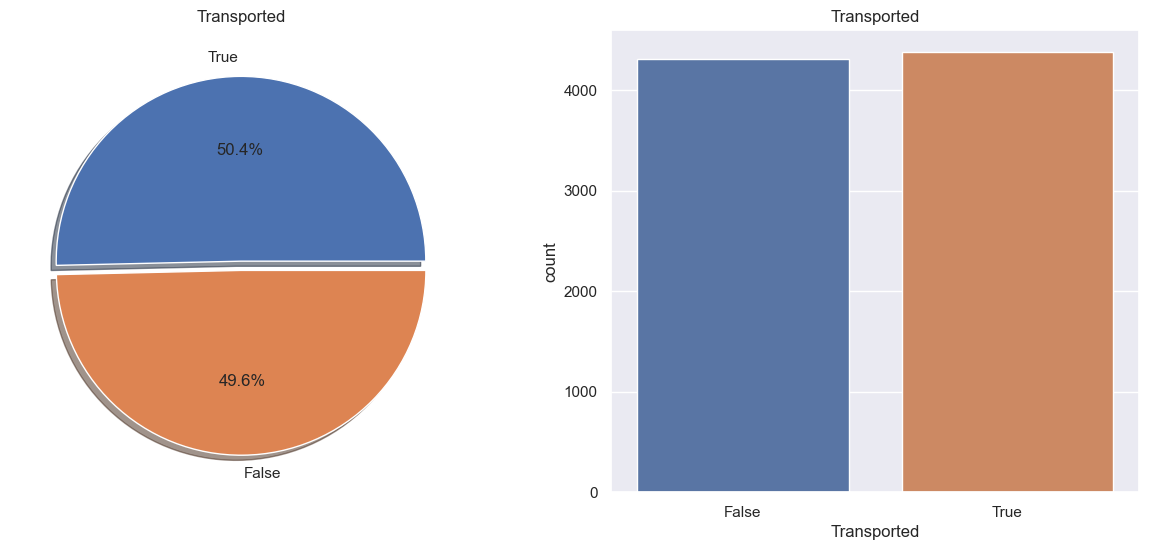

In [24]:
f, ax = plt.subplots(1,2,figsize = (15,6))

train['Transported'].value_counts().plot.pie(explode=[0,0.05],autopct = '%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Transported')
ax[0].set_ylabel("")

sns.countplot('Transported',data=train,ax=ax[1])
ax[1].set_title('Transported')
plt.show()

In [25]:
#Checking the number of Transported and Dead people

transported = train[train['Transported'] == True]
dead = train[train['Transported'] == False]

print("Transported: ", len(transported))
print("Dead: ", len(dead))

Transported:  4378
Dead:  4315


### Homeplanet - Transported Insights

In [26]:
pd.crosstab(train.HomePlanet, train.Transported, margins=True).style.background_gradient(cmap='summer_r')

Transported,False,True,All
HomePlanet,,,
Earth,2749,2054,4803
Europa,727,1404,2131
Mars,839,920,1759
All,4315,4378,8693


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


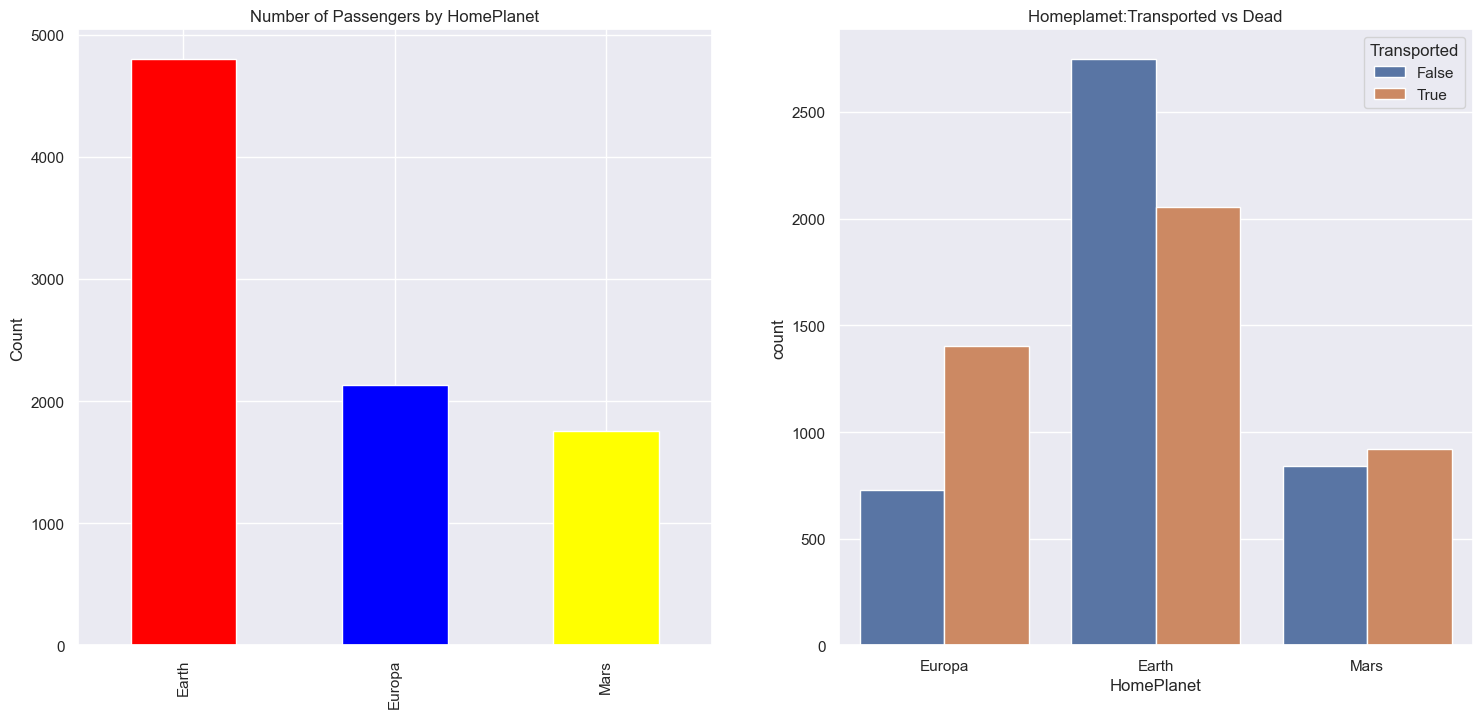

In [27]:
f, ax = plt.subplots(1,2, figsize=(18,8))

train['HomePlanet'].value_counts().plot.bar(ax=ax[0], color=['red','blue','yellow'])
ax[0].set_title("Number of Passengers by HomePlanet")
ax[0].set_ylabel('Count')

sns.countplot('HomePlanet', hue='Transported', data=train, ax=ax[1])
ax[1].set_title('Homeplamet:Transported vs Dead')

plt.show()

### Destination - Transported Insights

In [28]:
# Replacing Destination name and simplifying it

train['Destination'] = train['Destination'].replace(['TRAPPIST-1e'], 'T')
train['Destination'] = train['Destination'].replace(['55 Cancri e'], 'C')
train['Destination'] = train['Destination'].replace(['PSO J318.5-22'], 'P')

In [29]:
print(train["Destination"].value_counts())

T    6097
C    1800
P     796
Name: Destination, dtype: int64


In [30]:
pd.crosstab(train.Destination, train.Transported, margins=True).style.background_gradient(cmap='summer_r')

Transported,False,True,All
Destination,,,
C,702,1098,1800
P,395,401,796
T,3218,2879,6097
All,4315,4378,8693


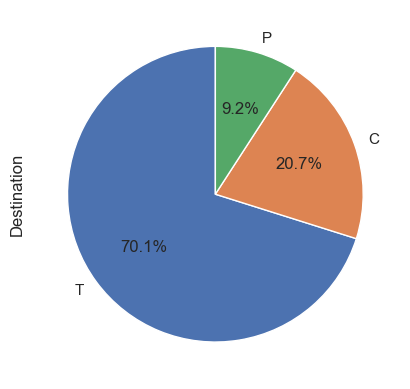

In [31]:
train['Destination'].value_counts().plot(kind='pie',  autopct='%1.1f%%', startangle=90)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


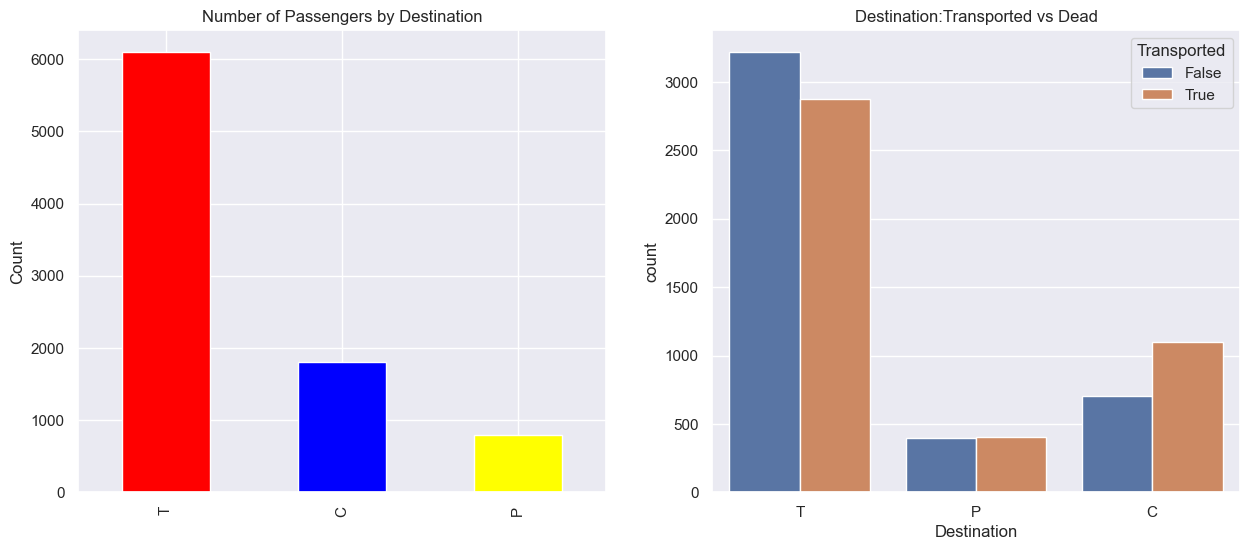

In [32]:
f, ax = plt.subplots(1,2, figsize=(15,6))

train['Destination'].value_counts().plot.bar(ax=ax[0], color=['red','blue','yellow'])
ax[0].set_title("Number of Passengers by Destination")
ax[0].set_ylabel('Count')

sns.countplot('Destination', hue='Transported', data=train, ax=ax[1])
ax[1].set_title('Destination:Transported vs Dead')

plt.show()

In [33]:
pd.crosstab([train.HomePlanet, train.Transported], train.Destination, margins = True).style.background_gradient(cmap='summer_r')

### Mapping Data

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [35]:
HomePlanet_mapping = {'Earth':0,'Europa':1,'Mars':2}

for d in train_test:
    d['HomePlanet'] = d['HomePlanet'].map(HomePlanet_mapping)

In [36]:
Destination_mapping = {'T':0,'C':1,'P':2}

for d in train_test:
    d['Destination'] = d['Destination'].map(Destination_mapping)

In [37]:
for d in train_test:
    dataset['CryoSleep'] = dataset['CryoSleep'].astype(int)
    dataset['VIP'] = dataset['VIP'].astype(int)

In [38]:
train.Transported = train.Transported.replace({True: 1, False: 0})     #no "Transported" collumn in test set

In [39]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


### Dropping

In [40]:
train.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)
train.shape

(8693, 11)

In [41]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,1


### Machine Learning Algorithms

In [42]:
target = train.Transported
train.drop('Transported', axis = 1, inplace=True)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
dtypes: bool(2), float64(6), int64(2)
memory usage: 560.4 KB


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn. model_selection import cross_val_score

In [45]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [46]:
# Decision Tree

clf_dt = DecisionTreeClassifier()
score = cross_val_score(clf_dt, train, target, cv=k_fold, scoring='accuracy')
score

array([0.72183908, 0.73103448, 0.74712644, 0.75028769, 0.70771001,
       0.76179517, 0.73647871, 0.75143843, 0.72842348, 0.7456847 ])

In [47]:
np.mean(score)*100

73.81818181818183

In [48]:
# Random Forest

clf_rf = RandomForestClassifier()
score = cross_val_score(clf_rf, train, target, cv=k_fold, scoring='accuracy')
score

array([0.77011494, 0.77471264, 0.79425287, 0.79976985, 0.76294591,
       0.79171461, 0.78826237, 0.7986191 , 0.7986191 , 0.78365938])

In [49]:
np.mean(score)*100

78.6267079348703

#### So, for this dataset, Random Forest Classifier works better than Decision Tree Classifier